In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import numpy as np

In [2]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1)

In [4]:
# dataset = pd.read_pickle('../../geodata/results/01_master_building_dataset.pkl')
dataset = pd.read_pickle('../../../geodata/results/01_master_building_dataset.pkl')


In [5]:
maxvsh_cols    = dataset.columns[dataset.columns.str.contains('maxvsh')].tolist()
vaccess_cols   = dataset.columns[dataset.columns.str.contains('vwa')].tolist()
# mean_cols      = dataset.columns[dataset.columns.str.contains('mn')].tolist()
dist_cols      = dataset.columns[dataset.columns.str.contains('sum_')].tolist()
vconfig_cols   = np.setdiff1d(dataset.columns[np.where(dataset.columns == 'snt_0')[0][0]:np.where(dataset.columns == 'cmpx_gini')[0][0]+1].tolist(),dist_cols).tolist()
id_cols        = ['ID_Geb','Stockwerk','FassPktX','FassPktY','FassPktZ']

dataset['unit_pano'] = dataset['unit_pano'].fillna(0)



In [ ]:
import joblib
xgb_model   = joblib.load("../../geodata/results/t10agglo_models/tr292ts73_XGB.joblib")
model_feats    = maxvsh_cols+vaccess_cols+vconfig_cols+dist_cols

import joblib
scaler_4model   = joblib.load("../../geodata/results/scaler_for_model.joblib")

X = dataset.copy()
X[model_feats] = scaler_4model.transform(dataset[model_feats])

X['XGB'] = xgb_model.predict(X[xgb_model.feature_names_in_])

In [6]:
sel_10agglo_lst = dataset.groupby(['Agglo_Name','Rich_Nabr'])['GMDNR'].size().unstack().sort_values(by = 'R', ascending = False).head(10).index.tolist()
# dat = X.query("Agglo_Name in @sel_10agglo_lst").query('net_income_ptp < 250')
dat = dataset.query("Agglo_Name in @sel_10agglo_lst").query('net_income_ptp < 250')


In [115]:
dat['error'] = np.log(dat['net_income_ptp']/dat['XGB'])

In [116]:
df = dat[['Agglo_Name','net_income_ptp','error']].melt(id_vars = ['Agglo_Name','net_income_ptp'])
df = dat[['Agglo_Name','error','XGB','net_income_ptp']].dropna().groupby('net_income_ptp').sample(10)

In [175]:
dfm = dat.reset_index().groupby('GMDNAME')['net_income_ptp','error','XGB'].mean()
dfm['err_min'] = dat.reset_index().groupby('GMDNAME')['error'].min()
dfm['err_max'] = dat.reset_index().groupby('GMDNAME')['error'].max()
dfm['err_var'] = dat.reset_index().groupby('GMDNAME')['error'].var()
dfm['err_med'] = dat.reset_index().groupby('GMDNAME')['error'].median()
dfm['err_skew'] = dat.reset_index().groupby('GMDNAME')['error'].skew()


C:\Users\swietek\AppData\Local\Temp\ipykernel_31040\1268852788.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfm = dat.reset_index().groupby('GMDNAME')['net_income_ptp','error','XGB'].mean()


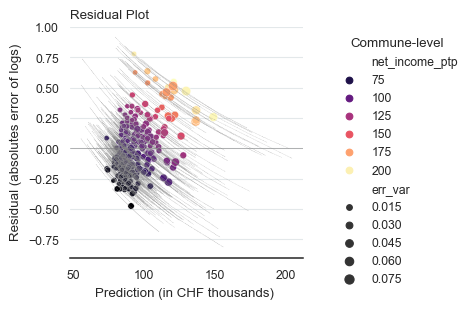

In [336]:
f, ax = plt.subplots(figsize=(3, 3))

sns.scatterplot(ax = ax, data = dfm , 
                x = 'XGB', y = 'err_med', size = 'err_var', hue = 'net_income_ptp', palette = 'magma', legend = True)
sns.lineplot(ax = ax, data = df, 
             x = 'XGB', y = 'error', style = 'net_income_ptp', color = 'grey', linewidth = 0.25, alpha = .75, legend = False)

sns.despine()
ax.set_xlabel("Prediction (in CHF thousands) ")
ax.set_ylabel('Residual (absolutes error of logs)')
ax.axhline(0, color = 'grey', linewidth = 0.5, alpha = .75)
ax.set_title('Residual Plot',loc = 'left', wrap = True)#,fontweight = 'bold', pad = 0)
ax.spines[['top','right','left']].set_visible(False)
ax.spines[['bottom','left']].set_linewidth(1.1)
ax.grid(which="major", axis='y', color='#758D99', alpha=0.2, zorder=1)
# ax.grid(which="major", axis='y', color='#758D99', alpha=0.2, zorder=5)

ax.legend(bbox_to_anchor=(1.1,1), title = "Commune-level", frameon = False)

In [355]:
import scipy

C:\Users\swietek\AppData\Local\Temp\ipykernel_31040\1438263844.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means = grp.groupby('GMDNAME')['net_income_ptp','XGB'].mean().reset_index()


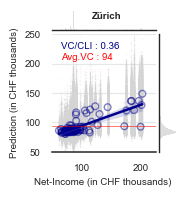

C:\Users\swietek\AppData\Local\Temp\ipykernel_31040\1438263844.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means = grp.groupby('GMDNAME')['net_income_ptp','XGB'].mean().reset_index()


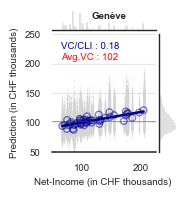

C:\Users\swietek\AppData\Local\Temp\ipykernel_31040\1438263844.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means = grp.groupby('GMDNAME')['net_income_ptp','XGB'].mean().reset_index()


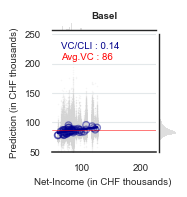

C:\Users\swietek\AppData\Local\Temp\ipykernel_31040\1438263844.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means = grp.groupby('GMDNAME')['net_income_ptp','XGB'].mean().reset_index()


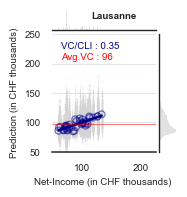

C:\Users\swietek\AppData\Local\Temp\ipykernel_31040\1438263844.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means = grp.groupby('GMDNAME')['net_income_ptp','XGB'].mean().reset_index()


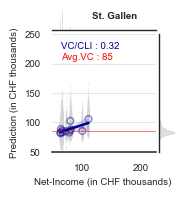

C:\Users\swietek\AppData\Local\Temp\ipykernel_31040\1438263844.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means = grp.groupby('GMDNAME')['net_income_ptp','XGB'].mean().reset_index()


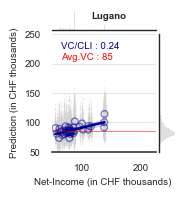

C:\Users\swietek\AppData\Local\Temp\ipykernel_31040\1438263844.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means = grp.groupby('GMDNAME')['net_income_ptp','XGB'].mean().reset_index()


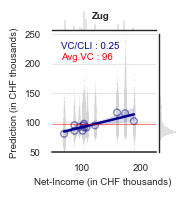

C:\Users\swietek\AppData\Local\Temp\ipykernel_31040\1438263844.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means = grp.groupby('GMDNAME')['net_income_ptp','XGB'].mean().reset_index()


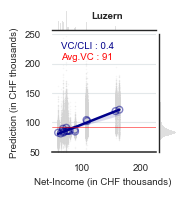

C:\Users\swietek\AppData\Local\Temp\ipykernel_31040\1438263844.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means = grp.groupby('GMDNAME')['net_income_ptp','XGB'].mean().reset_index()


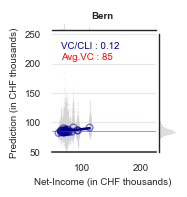

C:\Users\swietek\AppData\Local\Temp\ipykernel_31040\1438263844.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means = grp.groupby('GMDNAME')['net_income_ptp','XGB'].mean().reset_index()


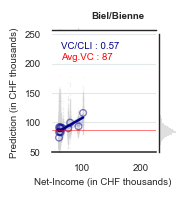

In [469]:
agglo_name = sel_10agglo_lst[3]
for agglo_name in sel_10agglo_lst:
    g = []
    
    grp = dat.query("Agglo_Name == @agglo_name")
    agglo_mn_vc = grp.XGB.mean()
    means = grp.groupby('GMDNAME')['net_income_ptp','XGB'].mean().reset_index()
    g = sns.jointplot(data=grp, x='net_income_ptp', y='XGB', color = 'lightgrey', alpha = .2, s = 1,height=2, marginal_kws=dict(bins=20, rug=False), kind="reg", scatter_kws={'alpha':.5,'edgecolor':'darkblue','facecolor':'none'}
    # sns.scatterplot(data = grp, x = 'net_income_ptp', y = 'XGB', alpha = .1, s = 1, color = 'lightgrey', ax=g.ax_joint)
    p = sns.regplot(data = means, x = 'net_income_ptp', y = 'XGB',ax = g.ax_joint, line_kws={'color':'darkblue'},scatter_kws={'alpha':.5,'edgecolor':'darkblue','facecolor':'none'})

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
    slope,agglo_mn_vc
    g.fig.suptitle(agglo_name,fontsize = 7, fontweight = 'bold',ha = 'left')
    g.fig.subplots_adjust(top=0.99)
    
    g.ax_joint.text(0.1, .5,f'VC/CLI : {round(slope,2)}', color = 'darkblue', transform=ax.transAxes,fontsize=7,horizontalalignment='left')
    g.ax_joint.text(0.1, .45,f'Avg.VC : {int(agglo_mn_vc)}', color = 'red', transform=ax.transAxes,fontsize=7,horizontalalignment='left')
    g.ax_joint.axhline(agglo_mn_vc, color = 'red', linewidth = 0.5, alpha = .75)
    g.ax_joint.set_xlabel("Net-Income (in CHF thousands) ", fontsize = 7)
    g.ax_joint.set_ylabel('Prediction (in CHF thousands)',fontsize = 7)
    g.ax_joint.tick_params(axis='both', which='major', labelsize=7)
    g.ax_joint.set_xlim((50,225))
    g.ax_joint.set_ylim((50,250))
    g.ax_joint.spines[['top','right','left']].set_visible(False)
    g.ax_joint.spines[['bottom']].set_linewidth(1.1)
    g.ax_joint.grid(which="major", axis='y', color='#758D99', alpha=0.2, zorder=1)
    plt.show()


In [203]:
z_lst = dat.query('Agglo_Name == "Zürich"').GMDNAME.value_counts()#.head(5).index.tolist()

In [255]:
z_lst = ["Zürich" ,"Zollikon", "Küsnacht (ZH)"  ,"Zumikon", "Erlenbach (ZH)" , 
         "Adliswil", "Kilchberg (ZH)","Rüschlikon","Langnau am Albis","Thalwil",'Oberrieden']      

In [256]:
#IMPORT ADMINISTRATION BOUNDARIES
ch_g2g18  = gpd.read_file('../../geodata/ch_districts/ch_districts_g2g18.gpkg')
ch_lakes = gpd.read_file('../../geodata/ch_lakes/ch_lakes.gpkg')

In [310]:
zlake = gpd.clip(ch_lakes.query('ID0 == "9050"').dissolve(), ch_g2g18.query('GMDNAME in @z_lst').dissolve().total_bounds)


(2675424.0, 2693068.0, 1234017.8, 1255296.2)

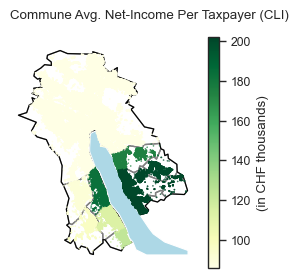

In [334]:
f, ax = plt.subplots(figsize=(3, 3))
ch_g2g18.query('GMDNAME in @z_lst').plot(edgecolor = 'grey', linewidth = 1, facecolor = 'none',ax=ax,zorder= 1)
ch_g2g18.query('GMDNAME in @z_lst').dissolve().plot(facecolor = 'none', edgecolor = 'black', ax = ax)
zlake.plot(color = 'lightblue', ax = ax)
dat.query('GMDNAME in @z_lst').plot('net_income_ptp', markersize = .1, ax=ax, cmap = 'YlGn', legend = True,
                                    legend_kwds={"label": "(in CHF thousands)"})


plt.title('Commune Avg. Net-Income Per Taxpayer (CLI)',loc = 'left', wrap = True)#,fontweight = 'bold', pad = 0)
plt.axis('off')

(2675424.0, 2693068.0, 1234017.8, 1255296.2)

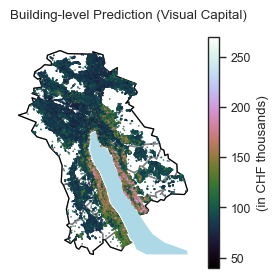

In [328]:
f, ax = plt.subplots(figsize=(3, 3))
ch_g2g18.query('GMDNAME in @z_lst').plot(edgecolor = 'grey', linewidth = 1, facecolor = 'none',ax=ax)
ch_g2g18.query('GMDNAME in @z_lst').dissolve().plot(facecolor = 'none', edgecolor = 'black', ax = ax)
zlake.plot(color = 'lightblue', ax = ax)
dat.query('GMDNAME in @z_lst').plot('XGB', markersize = .1, ax=ax, cmap = 'cubehelix', legend = True,
                                    legend_kwds={"label": "(in CHF thousands)"})

plt.title('Building-level Prediction (Visual Capital)',loc = 'left', wrap = True)#,fontweight = 'bold', pad = 0)
plt.axis('off')

In [314]:
dat['abs_error'] = np.abs(dat['error'])

(2675424.0, 2693068.0, 1234017.8, 1255296.2)

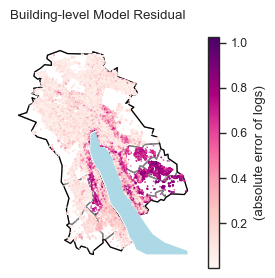

In [335]:
f, ax = plt.subplots(figsize=(3, 3))
ch_g2g18.query('GMDNAME in @z_lst').plot(edgecolor = 'grey', linewidth = 1, facecolor = 'none',ax=ax)
ch_g2g18.query('GMDNAME in @z_lst').dissolve().plot(facecolor = 'none', edgecolor = 'black', ax = ax)
zlake.plot(color = 'lightblue', ax = ax)
dat.query('GMDNAME in @z_lst').plot('abs_error', markersize = .1, ax=ax, cmap = 'RdPu', legend = True,
                                    legend_kwds={"label": "(absolute error of logs)"})

plt.title('Building-level Model Residual',loc = 'left', wrap = True)#,fontweight = 'bold', pad = 0)
plt.axis('off')